# Introducción a TensorFlow

In [1]:
import tensorflow as tf

In [2]:
x1 = tf.constant([1,2,3,4,5])
x2 = tf.constant([6,7,8,9,10])

In [3]:
res = tf.multiply(x1,x2)
res

<tf.Tensor 'Mul:0' shape=(5,) dtype=int32>

In [4]:
ses = tf.Session()
print(ses.run(res))
ses.close()

[ 6 14 24 36 50]


In [5]:
with tf.Session() as sess:
    output = sess.run(res)
    print(output)

[ 6 14 24 36 50]


In [6]:
config = tf.ConfigProto(log_device_placement=True) # me ayuda a trabajar con datos de imagenes 
config = tf.ConfigProto(allow_soft_placement=True)

# Aprendizaje Neuronal de las señales de trafico

In [7]:
import os
import skimage.io as imd

In [8]:
def load_data(data_directory):
    dirs = [d for d in os.listdir(data_directory) 
           if os.path.isdir(os.path.join(data_directory,d))] #obtenemos todas las carpetas de dentro
    labels=[]
    images=[]
    for d in dirs:
        label_dir = os.path.join(data_directory,d) # obtenemeos el subdirectorio
        file_names = [os.path.join(label_dir, f) 
                     for f in os.listdir(label_dir) if f.endswith("ppm")] #obtenemos todos los archivos dentro del subdirectorio
        for f in file_names:
            images.append(imd.imread(f))
            labels.append(int(d))
    return images,labels

In [9]:
main_dir='datasets/belgian'
train_data_dir= os.path.join(main_dir,'Training')
test_data_dir= os.path.join(main_dir,'Testing')

In [10]:
images, labels = load_data(train_data_dir)

In [11]:
len(images)

4575

In [12]:
import numpy as np

In [13]:
images = np.array(images)

D:\ProgramData\lib\site-packages\ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  """Entry point for launching an IPython kernel.


In [14]:
labels= np.array(labels)

In [15]:
images.ndim

1

In [16]:
images.size

4575

In [17]:
images[0] #primera foto en matriz

array([[[210, 249, 232],
        [204, 249, 208],
        [197, 198, 155],
        ...,
        [ 51,  60,  40],
        [ 54,  64,  44],
        [ 57,  66,  46]],

       [[209, 250, 236],
        [212, 255, 217],
        [200, 196, 156],
        ...,
        [ 49,  57,  38],
        [ 51,  59,  41],
        [ 53,  60,  42]],

       [[203, 246, 236],
        [207, 246, 213],
        [202, 192, 156],
        ...,
        [ 47,  53,  35],
        [ 48,  54,  36],
        [ 48,  55,  37]],

       ...,

       [[  2,  22,  25],
        [ 26,  56,  77],
        [ 71, 140, 159],
        ...,
        [ 84,  77,  50],
        [ 68,  66,  41],
        [ 56,  64,  44]],

       [[  0,  22,  32],
        [ 30,  75, 106],
        [ 87, 176, 198],
        ...,
        [ 86,  80,  52],
        [ 68,  66,  41],
        [ 55,  63,  42]],

       [[  0,  32,  50],
        [ 42, 101, 135],
        [121, 217, 239],
        ...,
        [ 87,  80,  52],
        [ 70,  68,  43],
        [ 58,  66,  46]]

In [18]:
labels.ndim

1

In [19]:
labels.size

4575

In [20]:
len(set(labels))

62

In [21]:
images.flags

  C_CONTIGUOUS : True
  F_CONTIGUOUS : True
  OWNDATA : True
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False
  UPDATEIFCOPY : False

In [22]:
images.itemsize

8

In [23]:
images.nbytes

36600

In [24]:
images.nbytes/ images.itemsize #bits que usamos

4575.0

In [25]:
import matplotlib.pyplot as plt

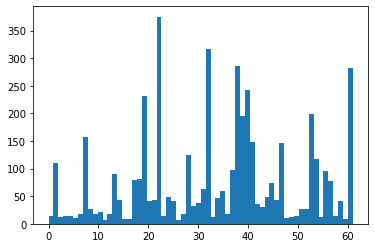

In [26]:
plt.hist(labels,len(set(labels)))
plt.show() #Histograma de frecuenbcias de las etiquetas

In [27]:
import random

In [28]:
rand_sings = random.sample(range(0,len(labels)), 6)
rand_sings

[173, 438, 2961, 640, 574, 1145]

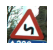

forma:(179, 194, 3), min:0, max255


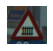

forma:(103, 108, 3), min:0, max157


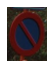

forma:(104, 76, 3), min:0, max185


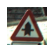

forma:(91, 94, 3), min:0, max255


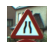

forma:(129, 143, 3), min:0, max255


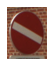

forma:(120, 91, 3), min:8, max255


In [29]:
for i in range(len(rand_sings)):
    temp_im = images[rand_sings[i]]
    plt.subplot(1,6,i+1)
    plt.axis("off")
    plt.imshow(images[rand_sings[i]])
    plt.subplots_adjust(wspace=0.5)
    plt.show()
    print("forma:{0}, min:{1}, max{2}".format(temp_im.shape, 
                                              temp_im.min(), 
                                              temp_im.max() ))

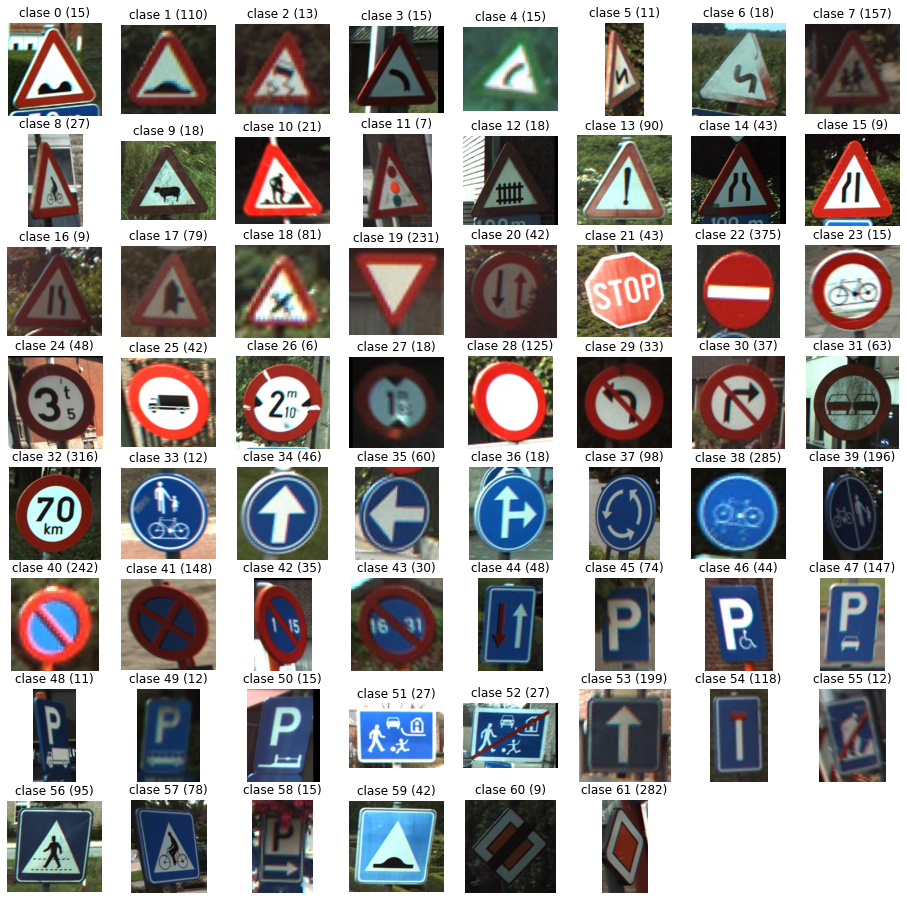

In [30]:
unique_labels = set(labels)
plt.figure(figsize=(16,16))
i=1
for label in unique_labels:
    temp_im= images[list(labels).index(label)] # posicion del indice,  posicion de la etiqueta para consultar img de procedencia
    plt.subplot(8,8,i)
    plt.axis("off")
    plt.title("clase {0} ({1})".format(label, list(labels).count(label)))
    i+=1
    plt.imshow(temp_im)
plt.show()

# Modelo de red neuronal con tensorflow
 * No todas las imgs son del mismo tamaño
 * hay 62 tipos de imgs
 * La distribución de señales de trafico no es uniforme (hay + de unas que de otras) 

Utilizar el color de las imgs es poco util, debido a la iluminación, que puede afectar el modelo

In [31]:
from skimage import transform

Para transformacion lineal de las fotos y cambiar el taamaño espicificado

In [32]:
w=9999
h=9999
for image in images:
    if image.shape[0] < w: #minimas
        w=image.shape[0]
    if image.shape[1] < h:
        h=image.shape[1]
print("Tamaño minimo {0}x{1}".format(w,h))

Tamaño minimo 22x20


In [33]:
images30 = [transform.resize(image, (30,30)) for i in images] # 30x30 ya que 22x20 era pequeño

In [34]:
images30[0]

array([[[0.29660131, 0.27176471, 0.24300654],
        [0.26915033, 0.24431373, 0.21555556],
        [0.24008715, 0.23006536, 0.19869281],
        ...,
        [0.28039216, 0.30849673, 0.1832244 ],
        [0.25673203, 0.26732026, 0.15437908],
        [0.27259259, 0.27429194, 0.17546841]],

       [[0.30078431, 0.2951634 , 0.25986928],
        [0.28784314, 0.27098039, 0.23960784],
        [0.27124183, 0.24771242, 0.22156863],
        ...,
        [0.28562092, 0.30392157, 0.18300654],
        [0.25176471, 0.26196078, 0.14980392],
        [0.2654902 , 0.27555556, 0.17189542]],

       [[0.29015251, 0.26230937, 0.23263617],
        [0.29398693, 0.26      , 0.23215686],
        [0.28235294, 0.25664488, 0.23333333],
        ...,
        [0.28954248, 0.34814815, 0.20283224],
        [0.25202614, 0.30104575, 0.17843137],
        [0.23250545, 0.24771242, 0.15986928]],

       ...,

       [[0.33250545, 0.34453159, 0.22631808],
        [0.3130719 , 0.31712418, 0.21712418],
        [0.30479303, 0

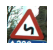

forma:(30, 30, 3), min:0.05076252723311553, max0.8844444444444444


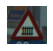

forma:(30, 30, 3), min:0.05076252723311553, max0.8844444444444444


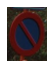

forma:(30, 30, 3), min:0.05076252723311553, max0.8844444444444444


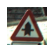

forma:(30, 30, 3), min:0.05076252723311553, max0.8844444444444444


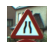

forma:(30, 30, 3), min:0.05076252723311553, max0.8844444444444444


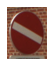

forma:(30, 30, 3), min:0.05076252723311553, max0.8844444444444444


In [35]:
for i in range(len(rand_sings)):
    temp_im = images30[rand_sings[i]]
    plt.subplot(1,6,i+1)
    plt.axis("off")
    plt.imshow(images[rand_sings[i]])
    plt.subplots_adjust(wspace=0.5)
    plt.show()
    print("forma:{0}, min:{1}, max{2}".format(temp_im.shape, 
                                              temp_im.min(), 
                                              temp_im.max() ))